In [ ]:
NAME: Akash Mishra
ROLL NO : 36
CLASS : BE IT (B2)
TITLE : Object detection using Transfer Learning of CNN architectures
            a. Load in a pre-trained CNN model trained on a large dataset
            b. Freeze parameters (weights) in model’s lower convolutional layers
            c. Add custom classifier with several layers of trainable parameters to model
            d. Train classifier layers on training data available for task
            e. Fine-tune hyper parameters and unfreeze more layers as needed

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [7]:
train_dir = r"C:\Users\AKASH\BE (DEEP LEARNING)\ASSIGNMENT 6\cifar-10-img\train"
test_dir  = r"C:\Users\AKASH\BE (DEEP LEARNING)\ASSIGNMENT 6\cifar-10-img\test"


In [11]:
train_dir

'C:\\Users\\AKASH\\BE (DEEP LEARNING)\\ASSIGNMENT 6\\cifar-10-img\\train'

In [13]:
test_dir

'C:\\Users\\AKASH\\BE (DEEP LEARNING)\\ASSIGNMENT 6\\cifar-10-img\\test'

In [17]:
train_datagen = ImageDataGenerator(
 rescale=1.0 / 255,
 )
test_datagen = ImageDataGenerator(
 rescale=1.0 / 255,
)


In [21]:
train_batch_size = 5000
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(32, 32),
    batch_size=train_batch_size,
    class_mode='categorical'
 )
 
test_batch_size = 1000
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(32, 32),
    batch_size=test_batch_size,
    class_mode='categorical'
 )

Found 40079 images belonging to 10 classes.
Found 9921 images belonging to 10 classes.


In [26]:
 x_train, y_train =  train_generator[0]
 x_test, y_test = test_generator[0]
 
print(len(x_train))
 print(len(x_test))

5000
1000


In [38]:
from tensorflow.keras.applications import VGG16

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 21s 0us/step


In [40]:
 for layer in base_model.layers:
   layer.trainable = False

In [42]:
 x = Flatten()(base_model.output)
 x = Dense(256, activation='relu')(x)
 x = tf.keras.layers.Dropout(0.3)(x)
 x = Dense(256, activation='relu')(x)
 x = tf.keras.layers.Dropout(0.3)(x)
 predictions = Dense(10, activation='softmax')(x)
 
# Create the model
 model = Model(inputs=base_model.input, outputs=predictions)
 # Compile the model
 model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])


In [44]:
# Train the model
model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 81s 960ms/step - accuracy: 0.3028 - loss: 1.9508 - val_accuracy: 0.4360 - val_loss: 1.6006
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 89s 1s/step - accuracy: 0.4380 - loss: 1.5776 - val_accuracy: 0.4740 - val_loss: 1.4673
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 68s 855ms/step - accuracy: 0.4870 - loss: 1.4375 - val_accuracy: 0.4920 - val_loss: 1.4053
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 88s 936ms/step - accuracy: 0.5314 - loss: 1.3402 - val_accuracy: 0.5240 - val_loss: 1.3568
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 0.5464 - loss: 1.2916 - val_accuracy: 0.5020 - val_loss: 1.3609
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 134s 951ms/step - accuracy: 0.5590 - loss: 1.2308 - val_accuracy: 0.5320 - val_loss: 1.3235
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 74s 940ms/step - accuracy: 0.5812 - loss: 1.1742 - val_accuracy: 0.5200 - val_loss: 1.3488
Epoch 8/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 83s 950ms/step - accuracy: 0.6010 - loss: 1.1412 - val_accuracy:

In [56]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
 # freeze all layers first
for layer in base_model.layers:
 layer.trainable = False
 # unfreeze last 4 layers of base model
for layer in base_model.layers[len(base_model.layers) - 4:]:
 layer.trainable = True
 # fine-tuning hyper parameters
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = tf.keras.layers.Dropout(0.3)(x)
x = Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.3)(x)
predictions = Dense(10, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)
 # Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
 # training fine tuned model
model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 140s 2s/step - accuracy: 0.2160 - loss: 2.0419 - val_accuracy: 0.3110 - val_loss: 1.5936
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 136s 2s/step - accuracy: 0.4562 - loss: 1.4779 - val_accuracy: 0.5500 - val_loss: 1.2519
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.5964 - loss: 1.1678 - val_accuracy: 0.5820 - val_loss: 1.1965
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 119s 2s/step - accuracy: 0.6786 - loss: 0.9640 - val_accuracy: 0.6430 - val_loss: 1.0757
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 126s 2s/step - accuracy: 0.7294 - loss: 0.8386 - val_accuracy: 0.6360 - val_loss: 1.1603
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 139s 2s/step - accuracy: 0.7804 - loss: 0.6850 - val_accuracy: 0.6030 - val_loss: 1.2809
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 145s 2s/step - accuracy: 0.7988 - loss: 0.6030 - val_accuracy: 0.6470 - val_loss: 1.1673
Epoch 8/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 127s 2s/step - accuracy: 0.8572 - loss: 0.4480 - val_accuracy: 0.6300 - v

In [58]:
 import matplotlib.pyplot as plt
 predicted_value = model.predict(x_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 16s 470ms/step


In [60]:
labels = list(test_generator.class_indices.keys())

Preditcted:  deer
Actual:  deer


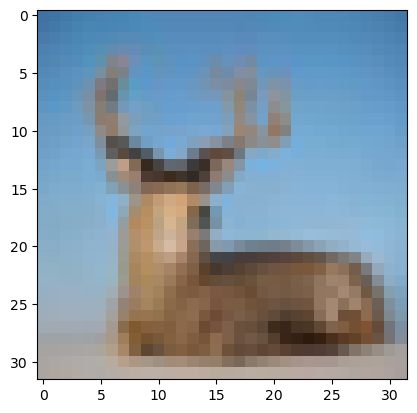

In [64]:
n=945
plt.imshow(x_test[n])
print("Preditcted: ",labels[np.argmax(predicted_value[n])])
print("Actual: ", labels[np.argmax(y_test[n])])

Preditcted:  horse
Actual:  horse


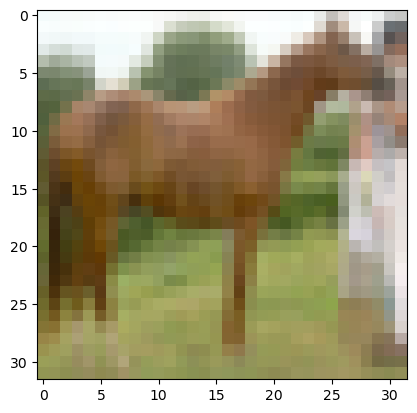

In [68]:
n=9
plt.imshow(x_test[n])
print("Preditcted: ",labels[np.argmax(predicted_value[n])])
print("Actual: ", labels[np.argmax(y_test[n])])